In [1]:
import plotly.graph_objects as go
import h5py
import numpy as np

In [2]:
# max order computed
max_order = 20

# open file with reference data
ref_fh = h5py.File("../data/boys_reference.h5", "r")

# open file with computed data
comp_fh = h5py.File("../data/boys_computed.h5", "r")

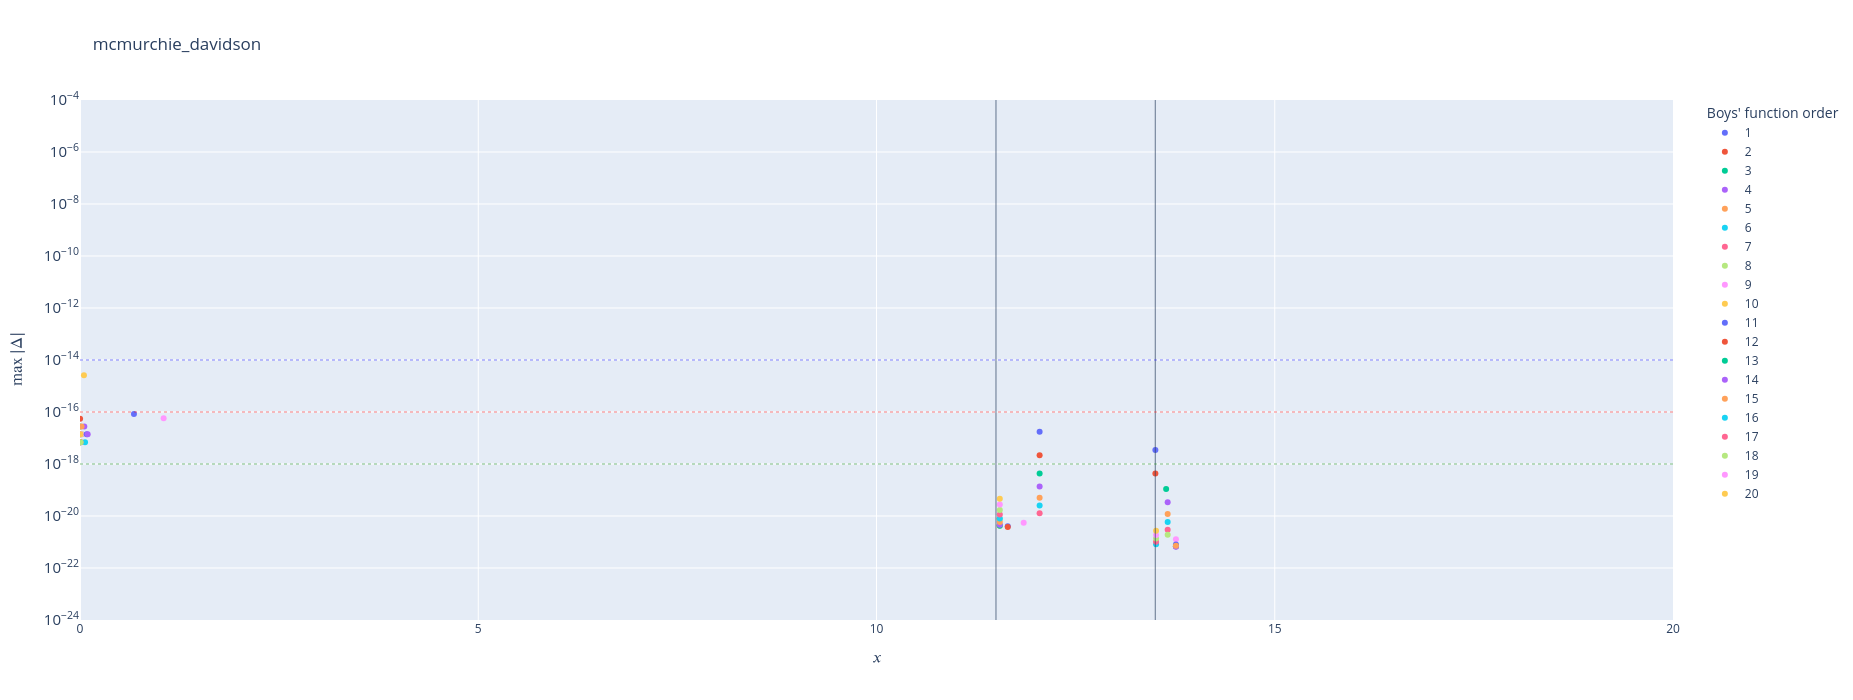

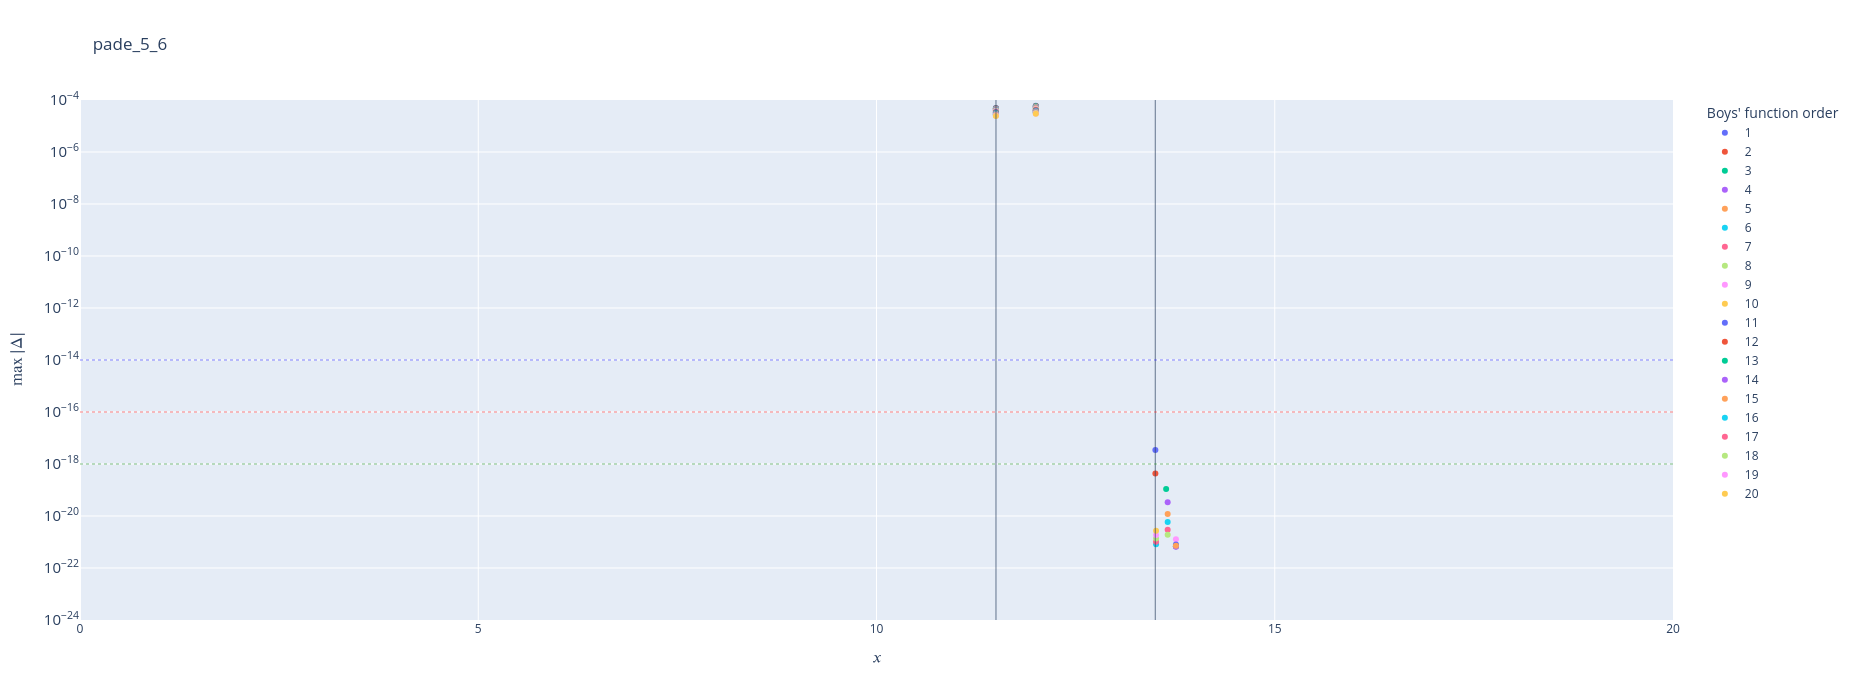

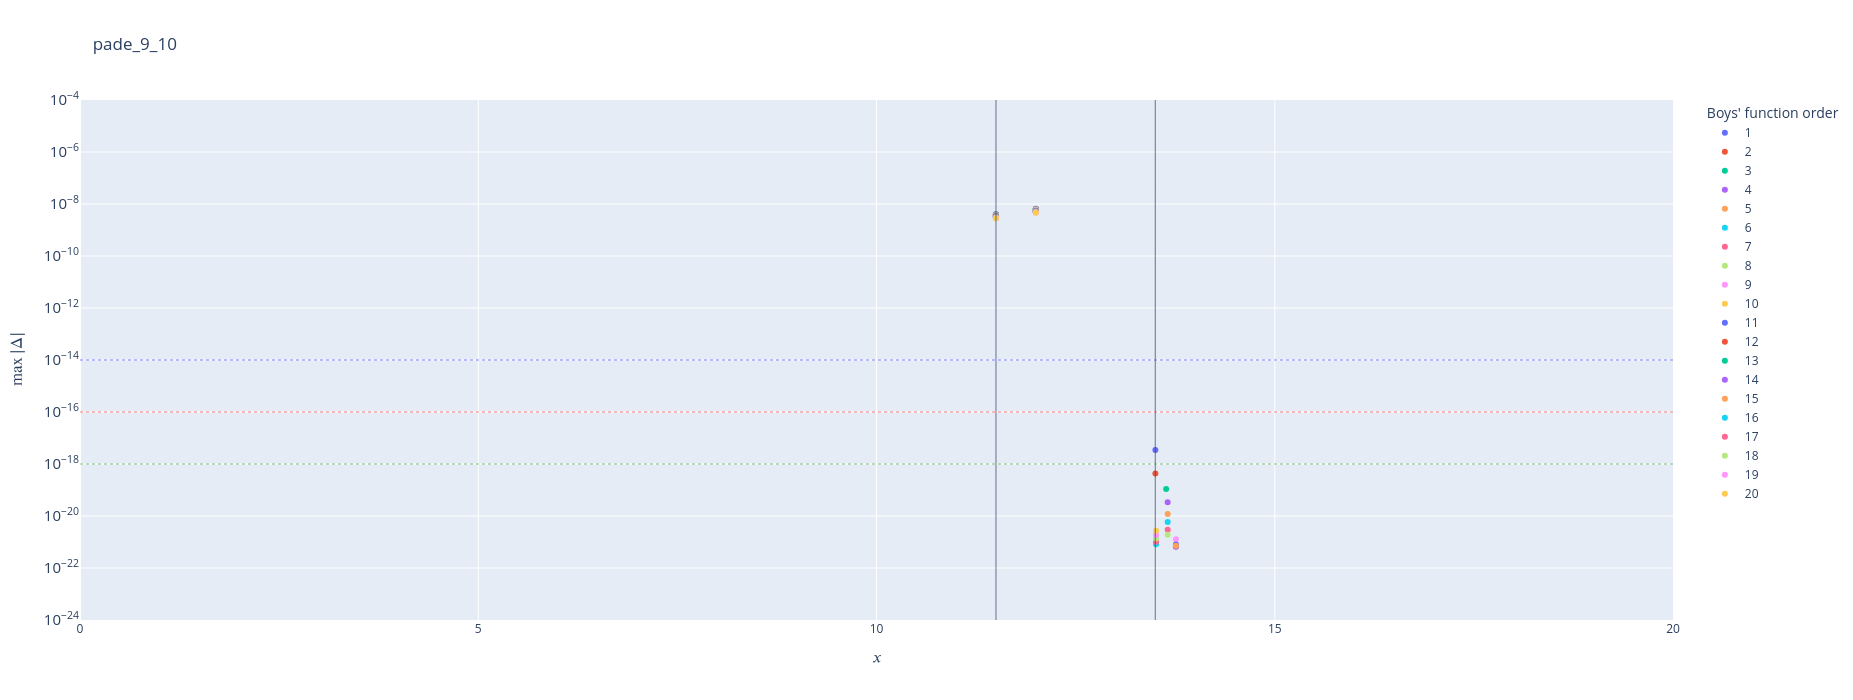

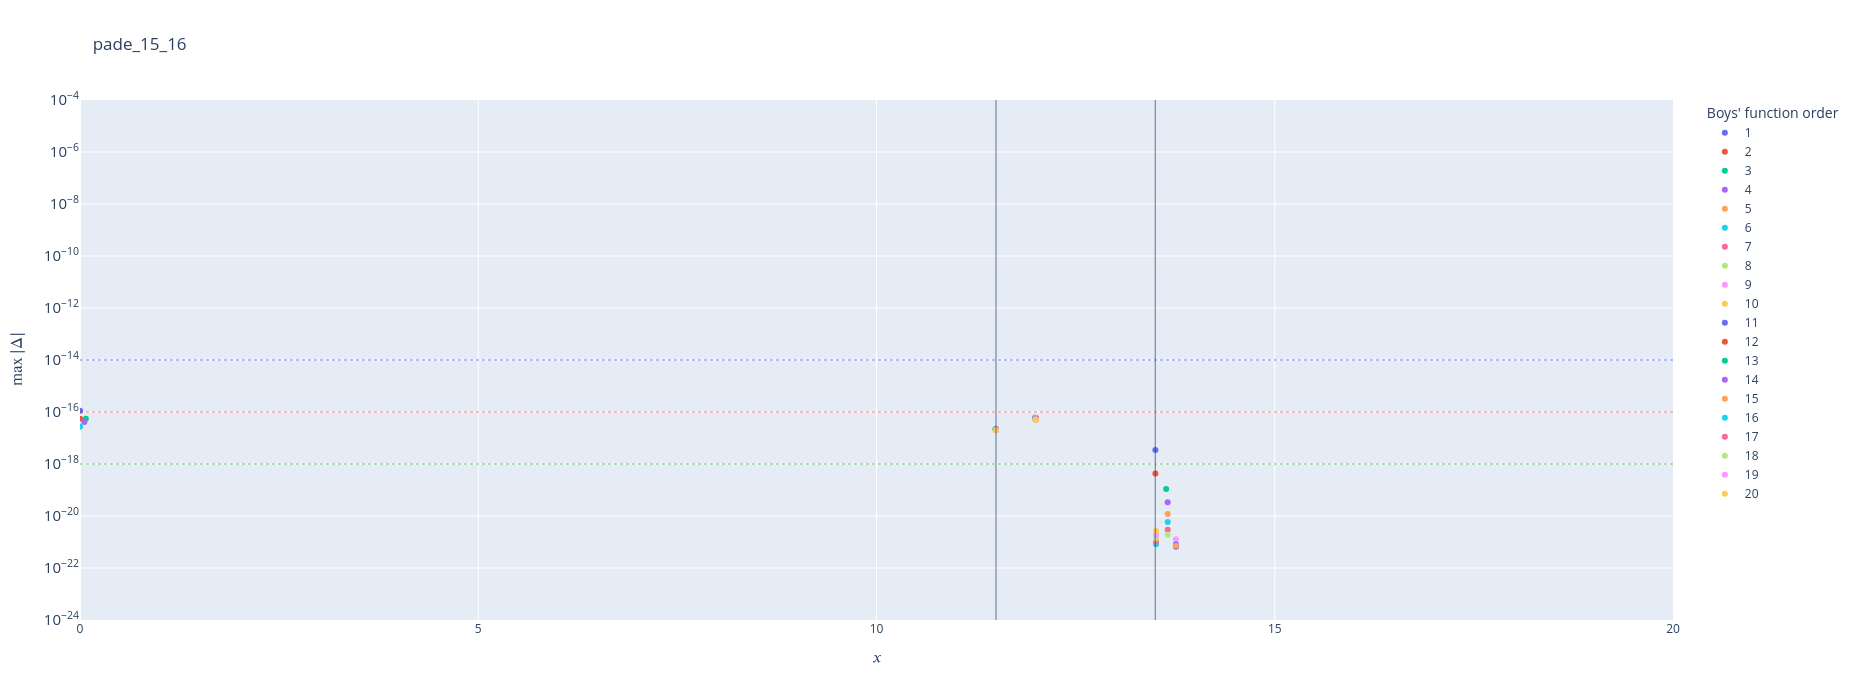

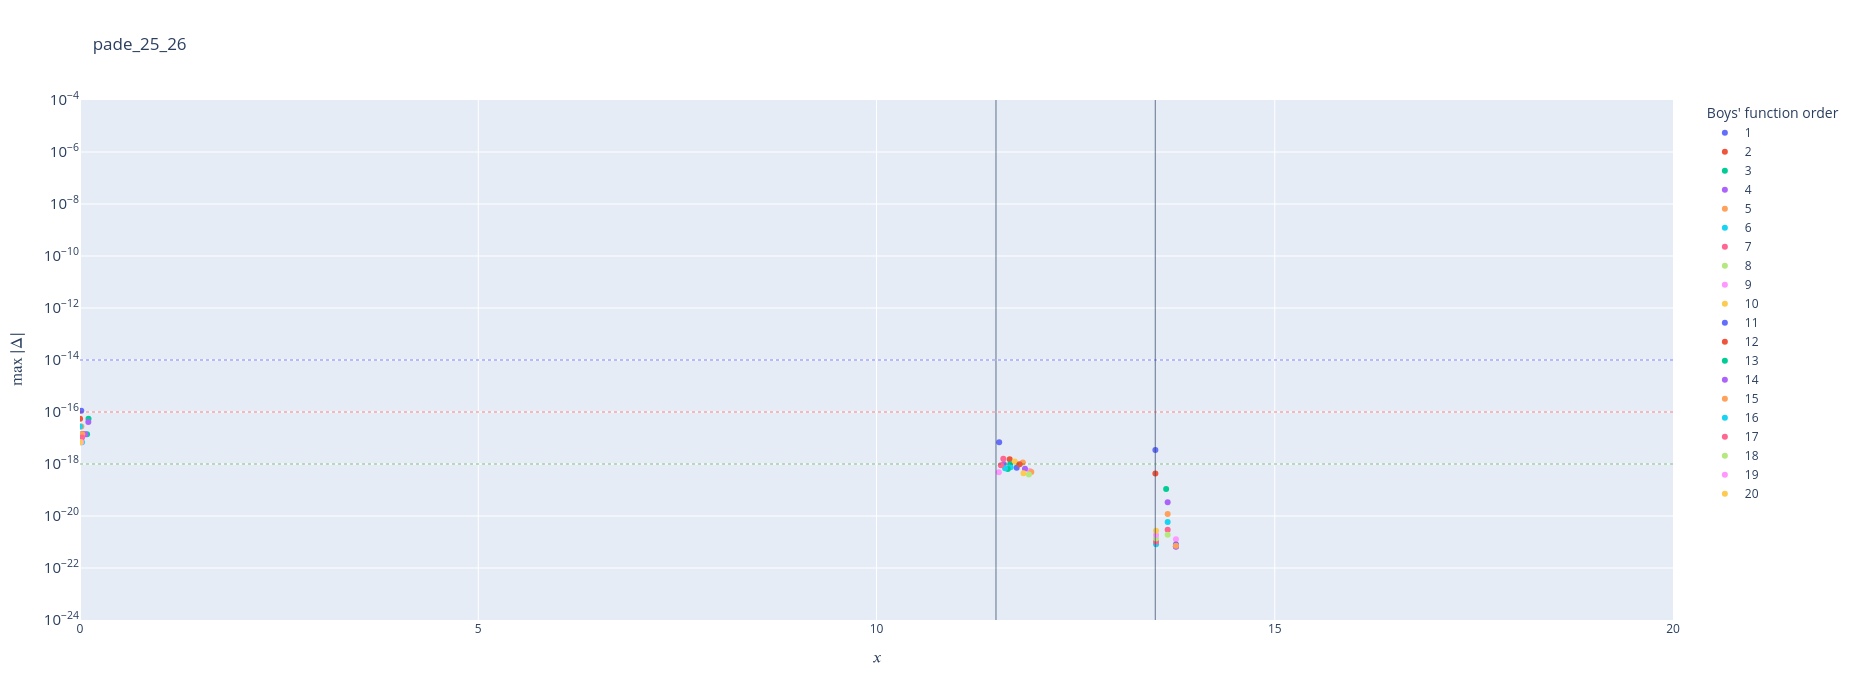

In [4]:
for method in ["mcmurchie_davidson", "pade_5_6", "pade_9_10", "pade_15_16", "pade_25_26"]:
    # initialize empty figure
    fig = go.Figure()
    # exclude order = 0 because it's the same for all methods
    for order in range(1, max_order+1):
        # points realizing the maximum absolute delta for each region/order
        xs = []
        deltas = []
        for region in ("lo", "mid", "hi"):
            # compute difference
            abs_diff_ys = np.abs(ref_fh[f"{region}_interval/ys/order_{order}"][:] - comp_fh[f"{region}_interval/{method}/cpu/ys/order_{order}"][:])
            # find index realizing the maximum absolute difference
            idx = np.argmax(abs_diff_ys)
            #print(f"{region=} {idx=}")
            # save maximum absolute difference
            deltas.append(abs_diff_ys[idx])
            # save corresponding x value from reference
            xs.append(ref_fh[f"{region}_interval/xs"][:][idx])
        # add line to plot
        fig.add_trace(
            go.Scatter(
                x=xs,
                y=deltas, 
                mode="markers", 
                name=f"{order}",
                hovertemplate=r"x = %{x}<br>max(|&#x394;|) = %{y}<extra></extra>",
            )
        )
    
    # make figure a bit prettier
    fig.update_layout(
        title=f"{method}",
        legend_title_text="Boys' function order",
        autosize=False,
        width=1500,
        height=700,
    )

    fig.update_xaxes(
        title_text=r"$x$", 
        range=[0.0, 20.0]
    )
    fig.update_yaxes(
        title_text=r"$\max|\Delta|$", 
        type="log", 
        range=[-24, -4],
        exponentformat="power",
    )
    # add vertical lines to delimit regions
    fig.add_vline(x=11.5, line_width=0.7)
    fig.add_vline(x=13.5, line_width=0.7)
    # add horizontal lines to delimit precision
    fig.add_hline(
        y=1e-14, 
        line_dash="dot",
        line_width=0.5,
        line_color="blue",
    )
    fig.add_hline(
        y=1e-16, 
        line_dash="dot",
        line_width=0.5,
        line_color="red")
    fig.add_hline(
        y=1e-18, 
        line_dash="dot",
        line_width=0.5,
        line_color="green"
    )
    # visualize
    fig.show()